In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [5]:
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [6]:
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [106]:
# train split, dev/validation split, test split
# 80 %, 10%, 10%
def build_dataset(words):
    block_size = 3
    X,Y = [],[]
    for word in words:
        #print(word)
        context = [0] * block_size
        for ch in word + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[c] for c in context), "-->", ch)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,X.dtype, Y.shape, Y.dtype)
    return X,Y

In [107]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
# train split, dev/validation split, test split
# 80 %, 10%, 10%

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.int64 torch.Size([182625]) torch.int64
torch.Size([22655, 3]) torch.int64 torch.Size([22655]) torch.int64
torch.Size([22866, 3]) torch.int64 torch.Size([22866]) torch.int64


In [109]:
n1, n2-n1, len(words)-n2

(25626, 3203, 3204)

In [11]:
C = torch.rand((27,2))

In [12]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [13]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

torch.concat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape 
###### [emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]] equivalent to torch.unbind Very in-efficient

###### Use view() which is very efficient interms of m/m allocation
example a = torch.arange(18) dims is 18
   a.view(9,2); dims is 9x2

In [14]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [15]:
h

tensor([[-0.0361, -0.6233, -0.5863,  ..., -0.9972,  0.9169,  0.9912],
        [-0.1478, -0.7478, -0.4639,  ..., -0.9943,  0.8527,  0.9829],
        [ 0.1577, -0.5761, -0.6480,  ..., -0.9916,  0.9387,  0.9941],
        ...,
        [ 0.6296, -0.5852, -0.6516,  ..., -0.7921,  0.9432,  0.9957],
        [ 0.8404, -0.0289, -0.8622,  ..., -0.9193,  0.9857,  0.9992],
        [ 0.3697, -0.8003, -0.3337,  ..., -0.9976,  0.9475,  0.9987]])

In [16]:
h.shape

torch.Size([32, 100])

In [17]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [18]:
logits = h @ W2 + b2 

In [19]:
logits.shape

torch.Size([32, 27])

In [20]:
counts = torch.exp(logits)
probs = counts / counts.sum(1, keepdims = True)

In [21]:
probs.shape

torch.Size([32, 27])

In [22]:
probs[0].sum()

tensor(1.0000)

In [23]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(18.7136)

In [24]:
### now making more respectable !!!!

In [120]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [171]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30,200),generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [172]:
sum(p.nelement() for p in parameters)

11897

#counts = logits.exp()
#probs = counts / counts.sum(1, keepdims = True)
#loss = -probs[torch.arange(32), Y].log().mean()
#loss

In [123]:
lre = torch.linspace(-3, 0 ,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [174]:
for p in parameters:
    p.requires_grad = True

In [175]:
lri = []
losses = []
steps = []

In [188]:
for i in range(200000):
    # mini-batch selection
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32,100
    logits = h @ W2 + b2 # 32, 27
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    #lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    # update params
    for p in parameters:
        p.data += -lr * p.grad
    # track status
    steps.append(i)
    #lri.append(lre[i])
    losses.append(loss.log10().item())

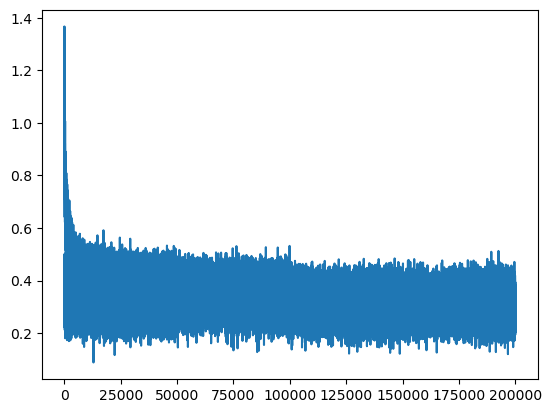

In [189]:
plt.plot(steps, losses)

In [190]:
emb = C[Xtr] # (32,3,2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32,100
logits = h @ W2 + b2 # 32, 27
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.0997042655944824


In [191]:
emb = C[Xdev] # (32,3,2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32,100
logits = h @ W2 + b2 # 32, 27
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.144556760787964


### Sample from the model

In [194]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(20):
    out = []
    context = [0]* block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(-1, 30) @ W1 + b1) 
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

dex.
mariah.
makilah.
tyhamellissana.
nella.
kaman.
arro.
zypunna.
hamilian.
moriella.
kinzon.
darette.
kamsi.
suhaiavion.
ratlyn.
hunite.
viah.
asu.
dedro.
anwil.


## Understanding learning rate decay, where we plot and see which learning rate needs to be selected
`plt.plot(lri, losses)
plt.show()`

##### Why loss i not zero.  Explanation
`print(logits.max(1))`
`print(Y)`

Print the two and we can see that for some examples, the output character is same when the input is different. like the case where, we have ... -> 'a' or ... -> 'b'


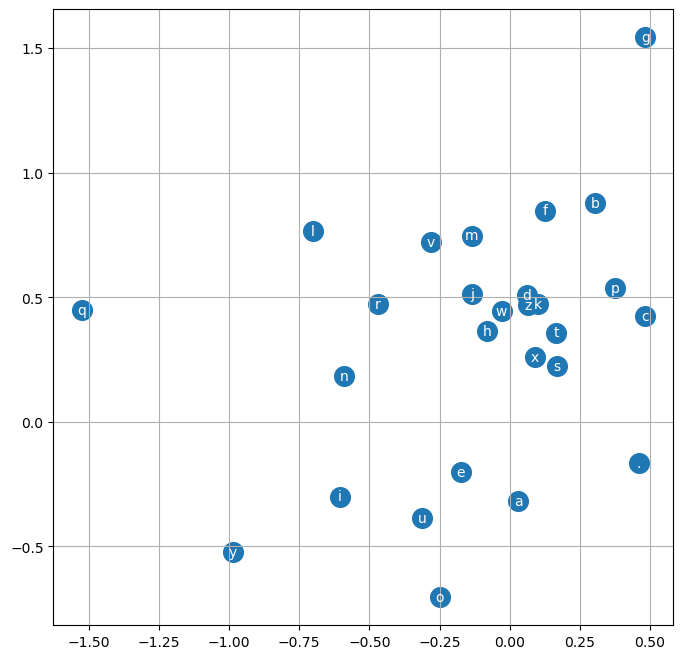

In [164]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i,1].item(), itos[i], ha="center", va="center", color = "white")
plt.grid("minor")

In [ ]:
### 